# Finite Element Method

In [4]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse import linalg as sla
from scipy.linalg import solve_banded as solve_b
import matplotlib.pyplot as plt

## Problem 1
Use the finite element method to solve

\begin{align}
	\begin{split}
	&{ }\epsilon y'' - y' = -1,\\
	&{ }y(0) = \alpha, \quad y(1) = \beta,
	\end{split} \label{eqn:FEM_exercise}
\end{align}

where $\alpha = 2, \beta = 4$, and $\epsilon = 0.02$.
Use $N = 100$ finite elements ($101$ grid points).
Plot and compare your solution with the analytic solution

$$y(x) = \alpha + x + (\beta - \alpha - 1 ) \frac{e^{x/\epsilon} -1}{e^{1/\epsilon} -1}$$

In [13]:
def finite_element_solver(alpha, beta, eps, x):        
    h = x[1:] - x[:-1]
    N = len(x)
    
    #print(x)
    #print(h,'\n')
    
    # we initialize A as a banded matrix so this method 
    # can be used with very large matrices on the order of (2**22, 2**22)
    
    
    # initialize A as specified using equation a at top of page 6 in lab
    A = np.zeros((3,N))#np.zeros((N,N))
    A[1,0] = 1
    A[1,-1] = 1
    A[1,1:-1] = -eps/h[1:] - eps/h[:-1]
    A[0,2:] = eps/h[1:] - 1/2
    A[2,0:-2] = eps/h[:-1] + 1/2


#     A[0, 0] = 1
#     A[-1, -1] = 1
    
#     A[1:-1, 1:-1] = np.diag(-eps/h[1:] - eps/h[:-1])
#     A[1:-1, 2:]  += np.diag(eps/h[1:] - 1/2) # +1 diagonal
#     A[1:-1, :-2] += np.diag(eps/h[:-1] + 1/2) #-1 diatonal
    
    #print(A)
    
    # initialize Phi as specified by equation l at top of page 6 in lab
    Phi = np.zeros(N)
    Phi[0] = alpha
    Phi[-1] = beta
    Phi[1:-1] = -1/2*(h[:-1] + h[1:])
    
    #A = sp.csr_matrix(A)
    
    return solve_b((1,1), A, Phi)#sla.spsolve(A, Phi)

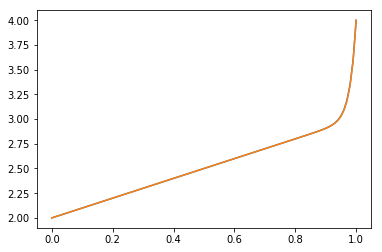

In [14]:
a, alpha = 0, 2
b, beta = 1, 4
eps = .02
N = 100
x = np.linspace(a, b, N+1)

y = alpha + x + (beta - alpha - 1)*(np.exp(x/eps) - 1)/(np.exp(1/eps) - 1)
y_hat = finite_element_solver(alpha, beta, eps, x)

plt.plot(x, y)
plt.plot(x, y_hat)
plt.show()

## Problem 2

One of the strengths of the finite element method is the ability to generate grids that better suit the problem.
The solution of this boundary value problem changes most rapidly near $x = 1$.
Compare the numerical solution when the grid points are evenly spaced versus when the grid points are clustered in the area of greatest change. Specifically, use the grid points defined by:

`even_grid = np.linspace(0,1,15)`

`clustered_grid = np.linspace(0,1,15)**(1./8)`

Plot the solution for each grid on the same plot, as well as the analytic solution.

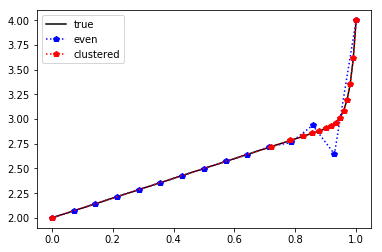

In [15]:
N = 15
even_grid = np.linspace(a, b, N)
clustered_grid = np.linspace(a, b, N)**(1./8)

sol_even = finite_element_solver(alpha, beta, eps, even_grid)
sol_clustered = finite_element_solver(alpha, beta, eps, clustered_grid)

plt.plot(x, y, 'k', label='true')
plt.plot(even_grid, sol_even, ':bp', label='even')
plt.plot(clustered_grid, sol_clustered, ':rp', label='clustered')
plt.legend()
plt.show()

## Problem 3

To examine the error convergence of this finite element method, solve the boundary value problem from Problem 1 on evenly spaced grids with $N = 2^i$ finite elements, $i = 4,5 \dots, 21$. Compute the error for each solution by comparing it to the analytic solution. Use the infinity-norm (the maximum absolute error). Then, make a log-log plot of the error against $h$, the stepsize in the evenly spaced grids. Notice that the error gets worse for very small values of $h$. This is when roundoff error overwhelms the computation.

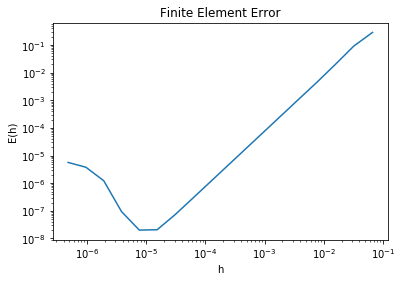

In [16]:
iters = 18
#iters = 18
error = np.zeros(iters)
hvals = np.zeros(iters)

for j, i in enumerate(range(4,iters+4)):
    x, h = np.linspace(a, b, 2**i, retstep=True)
    
    y = alpha + x + (beta - alpha - 1)*(np.exp(x/eps) - 1)/(np.exp(1/eps) - 1)
    y_hat = finite_element_solver(alpha, beta, eps, x)
    
    error[j] = np.max(np.abs(y-y_hat))
    hvals[j] = h
    
plt.loglog(hvals, error)
plt.xlabel('h')
plt.ylabel('E(h)')
plt.title('Finite Element Error')
plt.show()